In [142]:
import numpy as np
import matplotlib.pyplot as plt

showing values of x :  [0.85401615 0.34409601 0.68976082 0.92302991 0.43278434 0.40212882
 0.59903361 0.79117937 0.83925804 0.91499423 0.0527068  0.96750553
 0.33990013 0.91356415 0.8493531  0.21377065 0.6665107  0.12408626
 0.27870856 0.63184607]


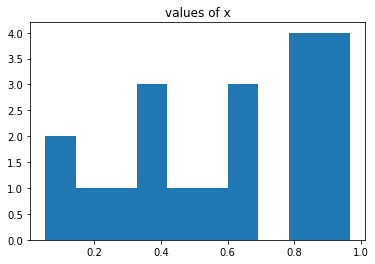

showing values of N :  [ 0.56356676  0.1736859   0.37634532 -0.73015204  0.24688769  0.57042229
  0.36816808  0.67074686  1.76335765  0.35023918  0.55663152  1.84680323
  0.79813107 -0.11384804 -0.38957109  0.70080484 -0.59406182 -0.07392294
 -0.17133512  0.09580308]


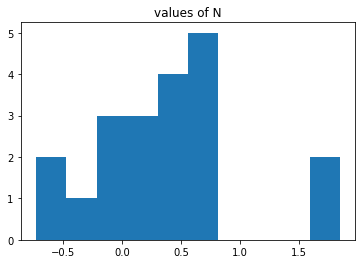

In [143]:
# rand = np.random.RandomState(20) 
x=np.random.uniform(0,1,20)
print('showing values of x : ',x)

plt.hist(x)
plt.title('values of x')
plt.show()

N=np.random.normal(size=20)
print('showing values of N : ',N)

plt.hist(N)
plt.title('values of N')
plt.show()


Values of y :  [2.4815454831706836, 1.0946777325839319, 2.074689245658128, 2.3595057897224585, 1.3671325040445448, 1.3437948529960244, 1.845233391615937, 2.3686859546722565, 2.690783559922075, 2.5602684302722305, 0.27685441026940555, 2.956712884182836, 1.207146812209768, 2.4647084473578933, 2.2812668712063813, 0.8067243949969006, 1.8237204061461176, 0.3740946761680498, 0.8301420352360785, 1.874937142954212]


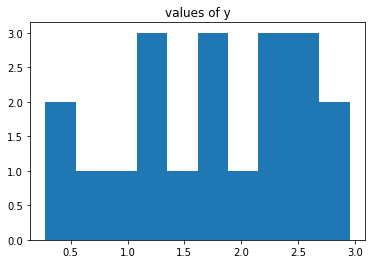

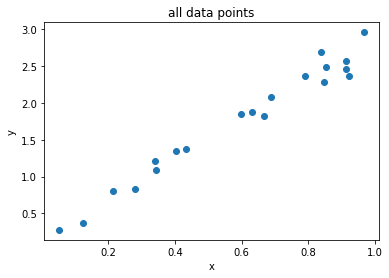

In [144]:
import math
y=[]
for i in range(20):
  # print(i)
  y.append((math.sin(x[i])*3.142)+(N[i]*0.2))
print('Values of y : ',y)

plt.hist(y)
plt.title('values of y')
plt.show()

plt.scatter(x,y)
plt.title('all data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [145]:
train_y=[]
test_y=[]
train_x=[]
test_x=[]
for i in range(20):
  if(i%2==0):
    train_y.append(y[i])
    train_x.append(x[i])
  else:
    test_y.append(y[i])
    test_x.append(x[i])

print("training set for y : ",train_y)
print("training set for x : ",train_x)
print("test set for y : ",test_y)
print("test set for x : ",test_x)

train_y=np.array(train_y)
test_y=np.array(test_y)
train_x=np.array(train_x)
test_x=np.array(test_x)

train_x=train_x.reshape(-1, 1)
train_y=train_y.reshape(-1, 1)
test_x=test_x.reshape(-1,1)
test_y=test_y.reshape(-1,1)


# plt.scatter(x,train_y)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# plt.scatter(x,test_set)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()



training set for y :  [2.4815454831706836, 2.074689245658128, 1.3671325040445448, 1.845233391615937, 2.690783559922075, 0.27685441026940555, 1.207146812209768, 2.2812668712063813, 1.8237204061461176, 0.8301420352360785]
training set for x :  [0.8540161494035533, 0.6897608224731946, 0.4327843398292567, 0.5990336094344978, 0.8392580423805753, 0.05270680181985443, 0.33990012613209386, 0.8493531029165209, 0.6665106976011617, 0.2787085647034423]
test set for y :  [1.0946777325839319, 2.3595057897224585, 1.3437948529960244, 2.3686859546722565, 2.5602684302722305, 2.956712884182836, 2.4647084473578933, 0.8067243949969006, 0.3740946761680498, 1.874937142954212]
test set for x :  [0.3440960091127666, 0.9230299086866511, 0.4021288171353238, 0.7911793688008961, 0.9149942303844848, 0.9675055251705843, 0.9135641539989098, 0.21377064965999037, 0.12408625558601183, 0.6318460744911946]


In [146]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [147]:
# train_x=np.array(train_x)
# train_y=np.array(train_y)
# train_x.reshape(-1)
# train_y.reshape(-1)
# polyreg=make_pipeline(PolynomialFeatures(9),LinearRegression())
# polyreg.fit(train_x,train_y)


# reference : https://moonbooks.org/Articles/How-to-implement-a-polynomial-linear-regression-using-scikit-learn-and-python-3-/
def Regression(i):
    polynomial_features = PolynomialFeatures(degree = i)
    x_transf=polynomial_features.fit_transform(train_x)
    
    model=LinearRegression()
    model.fit(x_transf,train_y)

    y_new=model.predict(x_transf)

    #training error
    rmse=np.sqrt(mean_squared_error(train_y,y_new))
    #test error
    rmse2=np.sqrt(mean_squared_error(test_y,y_new))
    
    r2=r2_score(test_y,y_new)
    
    print('RMSE of degree ',i,': ',rmse2)
    print('R2 of degree ',i,': ',r2)

    return polynomial_features, model





In [148]:
polynomial0, model0 = Regression(0)
weights0=model0.coef_ #https://stackoverflow.com/questions/47303261/getting-weights-of-features-using-scikit-learn-logistic-regression
w0=weights0.copy()
w0.resize(10,refcheck=False) #https://stackoverflow.com/questions/38191855/zero-pad-numpy-array
print('weights for degree 0: ',w0)

polynomial1, model1 = Regression(1)
weights1=model1.coef_  
w1=weights1.copy()
w1.resize(10,refcheck=False)
print('weights for degree 1: ',w1)

polynomial3, model3 = Regression(3)
weights3=model3.coef_
w3=weights3.copy()
w3.resize(10,refcheck=False)
print('weights for degree 3: ',w3)

polynomial9, model9 = Regression(9)
weights9=model9.coef_
w9=weights9.copy()
w9.resize(10,refcheck=False)
print('weights for degree 9: ',w9)


RMSE of degree  0 :  0.8304730846289393
R2 of degree  0 :  -0.026144447903677204
weights for degree 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
RMSE of degree  1 :  1.3290482172651878
R2 of degree  1 :  -1.6280816313985436
weights for degree 1:  [0.         2.73891137 0.         0.         0.         0.
 0.         0.         0.         0.        ]
RMSE of degree  3 :  1.3309171710082217
R2 of degree  3 :  -1.6354782276754518
weights for degree 3:  [ 0.          3.34587628 -1.37795546  0.87688192  0.          0.
  0.          0.          0.          0.        ]
RMSE of degree  9 :  1.2816588387188688
R2 of degree  9 :  -1.4440059008393873
weights for degree 9:  [        0.            106754.14451445  -1253506.32226431
   7512193.06233714 -26585415.44212332  58962803.21683002
 -83043333.54836094  72231451.10069895 -35418576.03238063
   7492674.26342133]


In [149]:
# https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/

from prettytable import PrettyTable

mytable=PrettyTable()

columns=['','Order 0','Order 1','Order 3','Order 9']

mytable.add_column(columns[0],['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9'])
mytable.add_column(columns[1],w0)
mytable.add_column(columns[2],w1)
mytable.add_column(columns[3],w3)
mytable.add_column(columns[4],w9)

print(mytable)

+----+---------+-------------------+--------------------+---------------------+
|    | Order 0 |      Order 1      |      Order 3       |       Order 9       |
+----+---------+-------------------+--------------------+---------------------+
| W0 |   0.0   |        0.0        |        0.0         |         0.0         |
| W1 |   0.0   | 2.738911365985998 | 3.345876284938076  |  106754.14451445124 |
| W2 |   0.0   |        0.0        | -1.377955460403016 |  -1253506.322264313 |
| W3 |   0.0   |        0.0        | 0.8768819186618131 |  7512193.062337137  |
| W4 |   0.0   |        0.0        |        0.0         | -26585415.442123324 |
| W5 |   0.0   |        0.0        |        0.0         |  58962803.216830015 |
| W6 |   0.0   |        0.0        |        0.0         |  -83043333.54836094 |
| W7 |   0.0   |        0.0        |        0.0         |  72231451.10069895  |
| W8 |   0.0   |        0.0        |        0.0         |  -35418576.03238063 |
| W9 |   0.0   |        0.0        |    

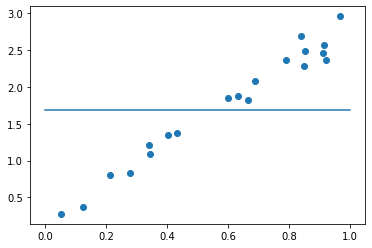

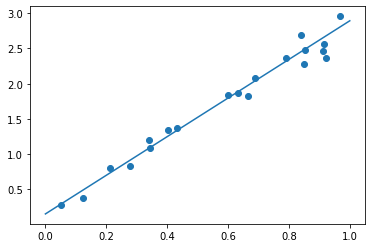

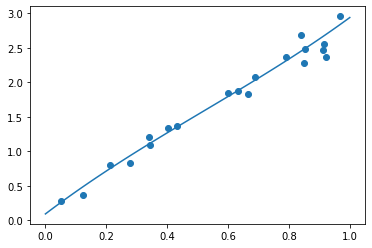

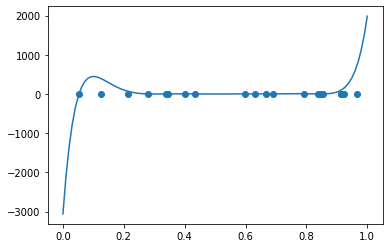

In [150]:
xnew=np.linspace(0,1,100)
xnew=np.array(xnew)
xnew=xnew.reshape(-1,1)
x_trans0=polynomial0.fit_transform(xnew)
y0=model0.predict(x_trans0)
plt.scatter(x,y)
plt.plot(xnew,y0)
plt.show()


x_trans1=polynomial1.fit_transform(xnew)
y1=model1.predict(x_trans1)
plt.scatter(x,y)
plt.plot(xnew,y1)
plt.show()

x_trans3=polynomial3.fit_transform(xnew)
y3=model3.predict(x_trans3)
plt.scatter(x,y)
plt.plot(xnew,y3)
plt.show()

x_trans9=polynomial9.fit_transform(xnew)
y9=model9.predict(x_trans9)
plt.scatter(x,y)
plt.plot(xnew,y9)
plt.show()


(10, 1)
(10, 1)
[1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074, 1.2213514968053074]
[1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174, 1.3050438046179174]


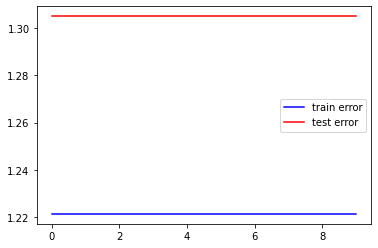

In [153]:
train_errors=[]
test_errors=[]
print(test_x.shape)
print(test_y.shape)

for i in range (0,10):
  polynomial_features = PolynomialFeatures(degree = i)
  x_transf=polynomial_features.fit_transform(train_x)
    
  model=LinearRegression()
  model.fit(x_transf,train_y)

  y_new=model.predict(x_transf)

  #training error
  rmse=np.sqrt(mean_squared_error(train_x,train_y))
  #test error
  rmse2=np.sqrt(mean_squared_error(test_x,test_y))

  train_errors.append(rmse)
  test_errors.append(rmse2)


print(train_errors)
print(test_errors)
models= np.linspace(0, 9, 10)
plt.plot(models,train_errors,label = 'train error', color = 'blue')
plt.plot(models,test_errors,label = 'test error', color = 'red')
plt.legend()
plt.show()




